# Class exercise 2 - Decision Tree - Iris dataset

In this exercise we will train a decision tree based on the iris dataset. we will use only petal length and petal width columns for our x data, along with species column as y.

The dataset will be split - 70% for training and 30% for test.

The following paramters will be fixed: criterion=entropy, cv=3 (cross validation), n_jobs = 4 (number of parallel jobs)

1. Examine the influnce of different parameters of the decision tree:
        a. Check the influence of the parameter "max_depth".
        b. Check the influence of the parameter "min_samples_leaf".
        c. Check the influence of the parameter "max_leaf_nodes".
2. Choose the optimal value of each paramter and run it all together.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

C:\Users\rash9\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read data from file
df = pd.read_csv('iris.csv')
y = df['species']

tmp = [df['petal_width'], df['petal_length']]

x = pd.DataFrame(data=tmp)
x = x.T

# Class example:
### Visualitaion of a tree

[Text(0.4, 0.8333333333333334, 'X[0] <= 0.75\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]\nclass = Virginica'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Setosa'),
 Text(0.6, 0.5, 'X[1] <= 4.95\nentropy = 0.993\nsamples = 71\nvalue = [0, 32, 39]\nclass = Virginica'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]\nclass = Versicolor'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]\nclass = Virginica')]

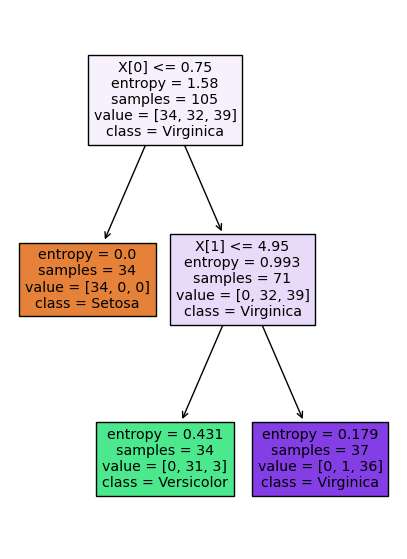

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
class_tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 2)
class_tree_clf.fit(x_train, y_train)
class_names = ['Setosa', 'Versicolor', 'Virginica']

# We look at 2 flower properties: petal width and petal length.
# We can see that every flower that it's petal width<0.75 (root of tree) is immediatley classified
# as Setosa, on the left side of the tree.
# Next (right side of tree), for all the rest of the flowers:
# we look at the petal length: if it's <4.95 than it's classified as versicolor, else it's virginica.

plt.figure(figsize=(5,7))
ax = plt.axes()
tree.plot_tree(class_tree_clf, filled=True, ax=ax, class_names=class_names)

In [4]:
def cm_and_accuracy(tree_clf, x_dataset, y_dataset):
    y_pred = tree_clf.predict(x_dataset)
    cm = confusion_matrix(y_dataset, y_pred)
    accuracy = cm.diagonal().sum()/cm.sum()
    return cm, accuracy

In [5]:
# Predict train values and calculate confusion matrix and accuracy
cm_train, accuracy_train = cm_and_accuracy(class_tree_clf, x_train, y_train)
print("Train confusion matrix:")
print(cm_train)
print()
print("Train accuracy:",accuracy_train)

Train confusion matrix:
[[34  0  0]
 [ 0 31  1]
 [ 0  3 36]]

Train accuracy: 0.9619047619047619


In [6]:
# Predict test values and calculate confusion matrix and accuracy
cm_test, accuracy_test = cm_and_accuracy(class_tree_clf, x_test, y_test)
print("Test confusion matrix:")
print(cm_test)
print()
print("Test accuracy:",accuracy_test)

Test confusion matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]

Test accuracy: 0.9111111111111111


# Classwork:

In [7]:
def calc_accuracy(tree, x, y, x_train, x_test, y_train, y_test):
               
        scores = cross_val_score(estimator=tree, X=x, y=y, cv=3, n_jobs=4)
        cross_acc = scores.mean()
    
        # train classifier
        tree.fit(x_train, y_train)

        # use the classifier on train data
        train_new_vals = cm_and_accuracy(tree, x_train, y_train)
        train_acc = train_new_vals[1]

        # use the classifier on test data  
        test_new_vals = cm_and_accuracy(tree, x_test, y_test)
        test_acc = test_new_vals[1]
        return cross_acc, train_acc, test_acc

In [8]:
def plot_accuracy(train_acc_vec, valid_vec_acc, test_vec_acc):
        
    tmp = len(train_acc_vec)+2

    plt.plot(range(2,tmp),train_acc_vec)
    plt.plot(range(2,tmp),valid_vec_acc)
    plt.plot(range(2,tmp),test_vec_acc)

    # find optimal value and it's index
    opt_value = max(valid_vec_acc)
    opt_value_index = valid_vec_acc.index(opt_value)+2
    
    # mark the optimal value with a red dot on the graph
    plt.plot(opt_value_index, opt_value, 'ro')
    
    plt.legend(["train", "validation", "test", "select value"])
    plt.ylabel("Accuracy")
    
    return opt_value_index

### Question 1a - tree depth:

In [9]:
# changed number of tree depth 
def dt_max_depth_check(x, y):
    
    # split data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    cross_acc = []
    train_acc = []
    test_acc = []
    
    for i in range (2,15):
        #create classifier
        tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth = i)
        
        accuracy_results = calc_accuracy(tree_clf, x, y, x_train, x_test, y_train, y_test)
        cross_acc.append(accuracy_results[0])
        train_acc.append(accuracy_results[1])
        test_acc.append(accuracy_results[2])
    
    return train_acc, test_acc, cross_acc

Text(0.5, 1.0, "Accruacy vs tree's maximal depth")

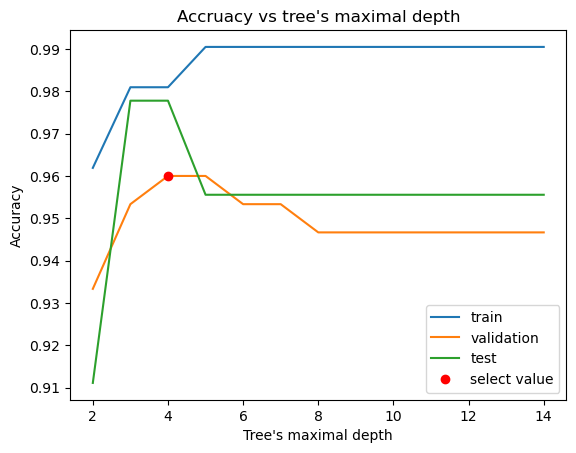

In [10]:
train_acc_vec, test_vec_acc, cross_valid_vec_acc = dt_max_depth_check(x, y)
depth_opt_value = plot_accuracy(train_acc_vec, cross_valid_vec_acc, test_vec_acc)
plt.xlabel("Tree's maximal depth")
plt.title("Accruacy vs tree's maximal depth")

### Question 1b - min sample leaf:

In [11]:
 # min samples leaf
def dt_min_sample_leaf_check(x, y):
    
    # split data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
    cross_acc = []
    train_acc = []
    test_acc = []
    
    for i in range(2,10):
        #create classifier
        tree_clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = i)
        
        accuracy_results = calc_accuracy(tree_clf, x, y, x_train, x_test, y_train, y_test)
        cross_acc.append(accuracy_results[0])
        train_acc.append(accuracy_results[1])
        test_acc.append(accuracy_results[2])
        
    return train_acc, test_acc, cross_acc

Text(0.5, 1.0, 'Accruacy vs minimal number of samples in a leaf')

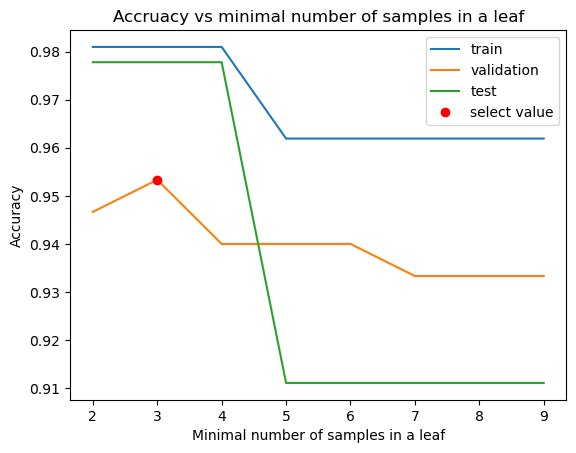

In [12]:
train_acc_vec, test_vec_acc, cross_valid_vec_acc = dt_min_sample_leaf_check(x, y)

leaf_opt_value = plot_accuracy(train_acc_vec, cross_valid_vec_acc, test_vec_acc)
plt.xlabel("Minimal number of samples in a leaf")
plt.title("Accruacy vs minimal number of samples in a leaf")

### Question 1c - max leaf node:

In [13]:
 # max leaf nodes
def dt_leaf_node_check(x, y):
    
    # split data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
    cross_acc = []
    train_acc = []
    test_acc = []
    
    for i in range(2,15):
        #create classifier
        tree_clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = i)

        accuracy_results = calc_accuracy(tree_clf, x, y, x_train, x_test, y_train, y_test)
        cross_acc.append(accuracy_results[0])
        train_acc.append(accuracy_results[1])
        test_acc.append(accuracy_results[2])
        
    return train_acc,test_acc, cross_acc

Text(0.5, 1.0, 'Accruacy vs maximal number of leaves')

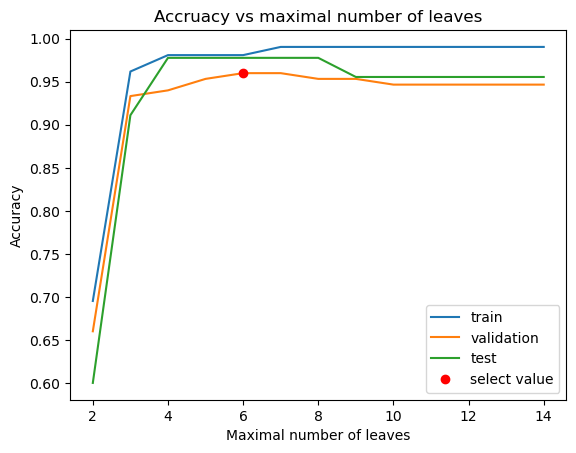

In [14]:
train_acc_vec, test_vec_acc, cross_valid_vec_acc = dt_leaf_node_check(x, y)
leaf_node_opt_value = plot_accuracy(train_acc_vec, cross_valid_vec_acc, test_vec_acc)
plt.xlabel("Maximal number of leaves")
plt.title("Accruacy vs maximal number of leaves")

### Question 2 - run it all together:

In [15]:
print("max_depth value:", depth_opt_value)
print("max_leaf_nodes value:", leaf_node_opt_value)
print("min_samples_leaf:", leaf_opt_value)

max_depth value: 4
max_leaf_nodes value: 6
min_samples_leaf: 3


In [16]:
def get_acc(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    accuracy = cm.diagonal().sum()/cm.sum()
    return accuracy

In [17]:
tree_clf = DecisionTreeClassifier(criterion='entropy',
                                  max_depth = depth_opt_value,
                                  max_leaf_nodes = leaf_node_opt_value,
                                  min_samples_leaf = leaf_opt_value)

# train classifier
tree_clf.fit(x_train, y_train)

# use the classifier on train data
y_pred_train = tree_clf.predict(x_train)
train_acc = get_acc(y_train, y_pred_train)
print ("train accuracy =", train_acc)

# use the classifier on test data
y_pred_test = tree_clf.predict(x_test)
test_acc = get_acc(y_test, y_pred_test)
print ("test accuracy =", test_acc)

train accuracy = 0.9809523809523809
test accuracy = 0.9777777777777777
